<a href="https://colab.research.google.com/github/aag112/ML_repo/blob/master/AmazonAlexaSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Research Questions


*   What do the reviews of Amazon Alexa tell us about consumer sentiment?
*   What products reflect most negative sentiment from consumers?
*   What products reflect positive sentiment from consumers?



With the rise of popularity of home goods from Amazon and Google, knowing how other consumers feel about such products help businesses assess what improvements are necessary and consumers select the best reviewed products from previous users. Here we use the dataset for Amazon Alexa reviews made popular by the Kaggle competition.

#Data Acquisition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import spacy

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/amazon_alexa.tsv', sep='\t')

#Data Wrangling

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
df['review_length']=df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [7]:
df.groupby('rating').describe()

feedback                      ... review_length                              
          count mean  std  min  25%  ...           min    25%    50%     75%     max
rating                               ...                                            
1         161.0  0.0  0.0  0.0  0.0  ...           1.0  36.00  120.0  284.00  1124.0
2          96.0  0.0  0.0  0.0  0.0  ...           1.0  78.75  163.0  309.25  1686.0
3         152.0  1.0  0.0  1.0  1.0  ...           1.0  54.00  130.0  284.00  1954.0
4         455.0  1.0  0.0  1.0  1.0  ...           1.0  34.00   99.0  241.00  1360.0
5        2286.0  1.0  0.0  1.0  1.0  ...           1.0  26.00   64.0  135.00  2851.0

[5 rows x 16 columns]

#EDA

In [8]:
ratings=df['rating'].value_counts()

fig = px.funnel_area(names=ratings.index,
                    values=ratings.values,
                    title='Distribution of Alexa Ratings')
fig.show()

In [9]:
feedback=df['feedback'].value_counts()
fig = px.pie(df, values=feedback.values, names=feedback.index,
            title='Distribution of Feedback')
fig.show()

In [10]:
reviews=px.histogram(df,x="review_length",title='Distribution of Length of Reviews',labels={"review_length":"Review Length"})
reviews.show()

In [11]:
reviews=px.histogram(df,x="review_length",color='feedback',title='Distribution of Length of Reviews by Feedback',labels={"review_length":"Review Length"})
reviews.show()

In [12]:
fig = px.bar(df, x="rating", y="review_length") 
fig.show()

#NLP

In [13]:
# INITIALIZE SPACY
nlp = spacy.load('en', disable=['parser', 'ner'])

In [14]:
# MAKE LOWERCASE
df['new_reviews'] = df['verified_reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['new_reviews'].head()

0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: new_reviews, dtype: object

In [15]:
# REMOVE PUNCTUATION
df['new_reviews'] = df['new_reviews'].str.replace('[^\w\s]','')
df['new_reviews'].head()

0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my 4 y...
4                                                music
Name: new_reviews, dtype: object

In [16]:
# REMOVE EMOJI
#REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [17]:
df['new_reviews'] = df['new_reviews'].apply(lambda x: remove_emoji(x))

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# REMOVE STOP WORDS
stop = stopwords.words('english')
df['new_reviews'] = df['new_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['new_reviews'].sample(30)

1281    got elderly parentseasy usejust instructions c...
3056    love dots easy use two plus echo spot one favo...
97      love echo love size material speaker quality h...
2722                                          works great
665     works great put sons room use drop option get ...
1973    works well need speak clearly picks commands g...
746     im still learning use far echo great sound act...
1742    waiting echo show go sale worth wait easy set ...
2881                                         fun interact
2866                                           volume low
2753                    works beautifully excellent sound
2991                               one week far say blast
3060    easy setup easy use work smart products always...
858     far love working getting things set love groce...
1404                                 pleasedsimple figure
966     glad got echo bluetooth speaker alexa much stu...
666                                               perfect
150     doesnt

In [22]:
# LEMMATIZATION
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])   

df['new_reviews']= df['new_reviews'].apply(space)

In [23]:
# CREATE NEW COLUMN "SENTIMENT" WHERE RATINGS 4 OR HIGHER ARE POSITIVE AND 3 AND BELOW ARE NEGATIVE
df['sentiment'] = np.where(df['rating']>= 4, 'positive', 'negative')

#Model

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



True

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, log_loss

In [28]:
df.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo,positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love,positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...,positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing 4 yr old learn dinosaur control ...,positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,positive


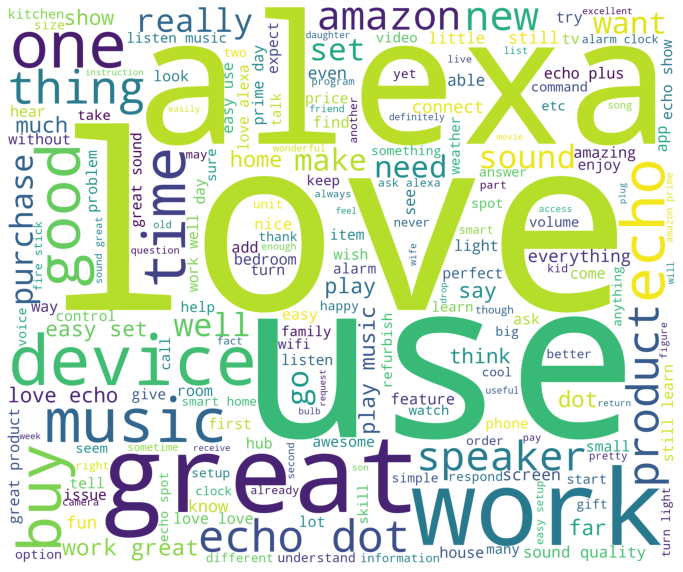

In [29]:
corpus_cloud = ' '.join(df['new_reviews'])
STOPWORDS.update(['PRON','would','also','’s'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus_cloud)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("wordcloud.jpg")
plt.show()

In [30]:
# CREATE DICTIONARY TO COUNT THE WORDS
count_dict_alex = {}

for doc in df['new_reviews']:
    for word in doc.split():
        if word in count_dict_alex.keys():
            count_dict_alex[word] +=1
        else:
            count_dict_alex[word] = 1
            
for key, value in sorted(count_dict_alex.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

dinosaur: 1
category: 1
grandaughter: 1
2000: 1
mile: 1
timermusic: 1
duty: 1
boost: 1
definitively: 1
input: 1
select: 1
encyclopedia: 1
greatit: 1
thermostatand: 1
lightswithout: 1
chair: 1
dislikes: 1
pauses: 1
pattern: 1
spoken: 1
promp: 1
poop: 1
joke34: 1
naw: 1
outsmart: 1
echosecho: 1
6th: 1
divertido: 1
1000: 1
speaknspell: 1
iove: 1
soundgood: 1
fm: 1
native: 1
americans: 1
whose: 1
texas: 1
birth: 1
additionally: 1
marginal: 1
extender: 1
ten: 1
dust: 1
collector: 1
broken: 1
34fixes34: 1
34never: 1
34certified: 1
receiving: 1
acknowledge: 1
indicate: 1
perfectlyvery: 1
productsand: 1
journey: 1
daytoday: 1
surely: 1
portion: 1
leary: 1
puny: 1
wear: 1
tear: 1
mint: 1
teenager: 1
insist: 1
dinnera: 1
lifechange: 1
simplicity: 1
gazebo: 1
sortof: 1
complaini: 1
timework: 1
diagnostic: 1
roomba: 1
sentence: 1
onehonestly: 1
productonce: 1
itthis: 1
shock: 1
clone: 1
boat: 1
garage: 1
loli: 1
gf: 1
intermittently: 1
pulsate: 1
pulse: 1
buddy: 1
easierthough: 1
psychological: 1


In [32]:
# REMOVE WORDS THAT OCCUR LESS THAN 10 TIMES
low_value = 10
bad_words = [key for key in count_dict_alex.keys() if count_dict_alex[key] < low_value]

In [33]:
# CREATE A LIST OF LISTS - EACH DOCUMENT IS A STRING BROKEN INTO A LIST OF WORDS
corpus = [doc.split() for doc in df['new_reviews']]
clean_list = []
for document in corpus:
    clean_list.append([word for word in document if word not in bad_words])

In [34]:
# USE CLEAN_LIST TO CREATE CORPUS
corpus=[]
for item in clean_list:
    item = ' '.join(item)
    corpus.append(item)
    
corpus

['love echo',
 'love',
 'sometimes play game answer question correctly alexa say get wrong answer like able turn light away home',
 'lot fun thing 4 old learn control light play game like nice sound play music well',
 'music',
 'receive echo gift need another bluetooth something play music easily find smart speaker can not wait see else',
 'without can not use many feature see use great alarm u almost hear alarm bedroom live room reason enough keep fun ask question hear response seem yet',
 'think one -PRON- have purchase -PRON- be work get one every room house really like feature offer play music echos control light throughout house',
 'look great',
 'love -PRON- have listen song have not hear since get news weather information great',
 'send year old dad talk constantly',
 'love learn know thing still figure everything work far easy use understand make laugh time',
 'purchase mother problem give something try come get around fast like enjoy little big thing play song time cook',
 'lo

In [35]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize

In [36]:
clean_list[0][:5]

['love', 'echo']

In [37]:
# CREATE THE INPUTS OF LDA MODEL: DICTIONARY AND CORPUS
corpora_dict = corpora.Dictionary(clean_list)
corpus = [corpora_dict.doc2bow(line) for line in clean_list]

In [38]:
# TRAIN THE LDA MODEL
lda_model = LdaModel(corpus=corpus,
                         id2word=corpora_dict,
                         random_state=100,
                         num_topics=3,
                         passes=5,
                         per_word_topics=True)

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.037*"easy" + 0.033*"love" + 0.032*"great" + 0.031*"alexa" + 0.030*"use" + 0.023*"product" + 0.021*"set" + 0.017*"not" + 0.016*"tv" + 0.016*"smart"'),
 (1,
  '0.031*"music" + 0.025*"use" + 0.025*"not" + 0.021*"play" + 0.019*"like" + 0.017*"-PRON-" + 0.017*"get" + 0.017*"love" + 0.014*"do" + 0.014*"be"'),
 (2,
  '0.054*"echo" + 0.052*"love" + 0.037*"dot" + 0.036*"work" + 0.029*"speaker" + 0.028*"sound" + 0.025*"great" + 0.020*"good" + 0.018*"like" + 0.015*"one"')]

In [39]:
from gensim.models.word2vec import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api

In [40]:
# Train Word2Vec model. Defaults result vector size = 100
model = Word2Vec(clean_list, min_count = 0, workers=cpu_count())

# Get the word vector for given word
model['sound']

model.most_similar('sound')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



[('well', 0.9997844696044922),
 ('full', 0.9997628331184387),
 ('size', 0.9997566938400269),
 ('good', 0.9997352361679077),
 ('small', 0.9997295141220093),
 ('speaker', 0.9997240304946899),
 ('much', 0.999721348285675),
 ('nice', 0.9997146725654602),
 ('perfect', 0.9997143149375916),
 ('come', 0.9997079968452454)]

In [41]:
dct = corpora.Dictionary(clean_list)
corpus = [dct.doc2bow(line) for line in clean_list]

# Build the bigram models
bigram = gensim.models.phrases.Phrases(clean_list, min_count=3, threshold=10)

# Construct bigram
print(bigram[clean_list[1]])

['love']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [42]:
analyser = SentimentIntensityAnalyzer()

In [43]:
def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print(str(vs))
        results.append(vs) 
    return results

In [44]:
sentiment = sentimentScore(df['new_reviews'])

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
{'neg': 0.141, 'neu': 0.636, 'pos': 0.223, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.436, 'pos': 0.564, 'compound': 0.926}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.8555}
{'neg': 0.117, 'neu': 0.704, 'pos': 0.18, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.6361}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8519}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.8934}
{'neg': 0.094, 'neu': 0.625, 'pos': 0.281, 'compound': 0.6597}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.9274}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.416, 'neu': 0.112, 'pos': 0.472, 'compound': 0.128}
{'neg': 0.0, 'neu': 0.262, 'pos': 0.738, 'compound

In [45]:
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.192,0.808,0.6369
1,0.000,0.000,1.000,0.6369
2,0.141,0.636,0.223,0.2023
3,0.000,0.436,0.564,0.9260
4,0.000,1.000,0.000,0.0000


In [46]:
# align index to copy rating column for joining
df.index = sentiment_df.index
sentiment_df['rating'] = df['rating']
echo_vader = pd.concat([df, sentiment_df], axis=1)
echo_vader.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment,neg,neu,pos,compound,rating
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo,positive,0.000,0.192,0.808,0.6369,5
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love,positive,0.000,0.000,1.000,0.6369,5
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...,positive,0.141,0.636,0.223,0.2023,4
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing 4 yr old learn dinosaur control ...,positive,0.000,0.436,0.564,0.9260,5
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,positive,0.000,1.000,0.000,0.0000,5


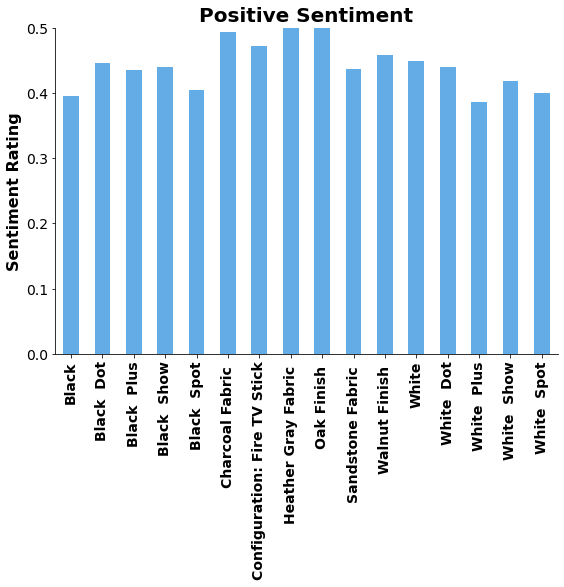

''

<Figure size 432x288 with 0 Axes>

In [47]:
#positive sentiment
color = ['#63ace5']
ax = echo_vader.groupby("variation").pos.mean().plot.bar(color = color, figsize = (9, 6))

plt.title('Positive Sentiment', fontsize = 20, weight='bold')

# plt.xlabel('Variation', fontsize = 16, weight='bold')
plt.xticks(rotation='90', fontsize=14, weight='bold')
ax.xaxis.label.set_visible(False)

plt.ylabel('Sentiment Rating', fontsize=16, weight='bold')
ax.set_ylim([0,0.5])
plt.yticks(fontsize=14)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('postive_sentiment.jpg')
;

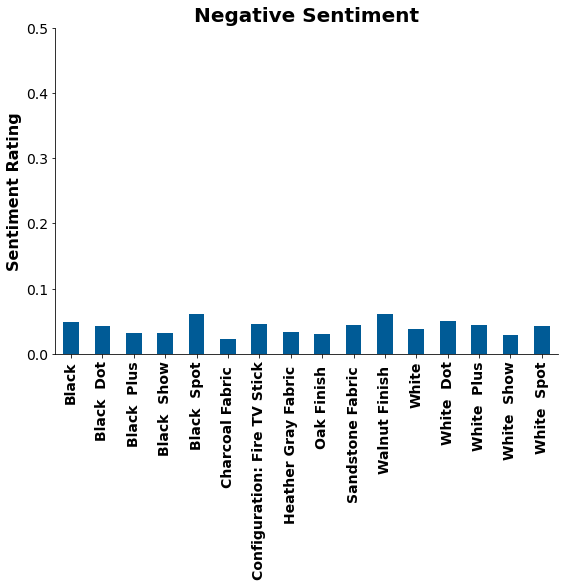

''

<Figure size 432x288 with 0 Axes>

In [48]:
#negative sentiment
color = ['#005b96']
ax = echo_vader.groupby("variation").neg.mean().plot.bar(color = color, figsize = (9, 6))

plt.title('Negative Sentiment', fontsize = 20, weight='bold')

# plt.xlabel('Variation', fontsize = 16, weight='bold')
plt.xticks(rotation='90', fontsize=14, weight='bold')
ax.xaxis.label.set_visible(False)

plt.ylabel('Sentiment Rating', fontsize=16, weight='bold')
ax.set_ylim([0,0.5])
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('negative_sentiment.jpg')
;


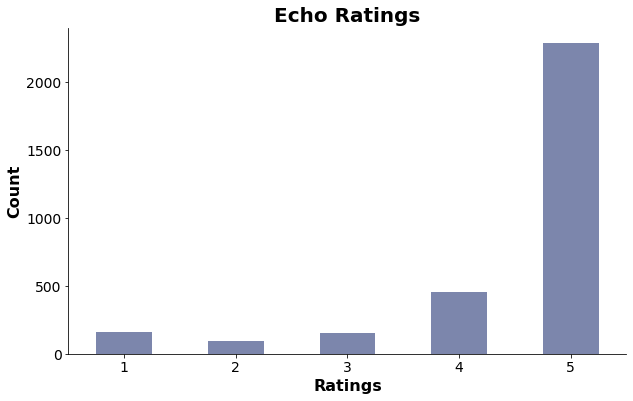

In [49]:
group = df.groupby('rating').count()
group['date']

color = plt.cm.bone(np.linspace(0, 1, 6))
ax = group['date'].plot.bar(color='#7c86ac', figsize = (10, 6))

plt.title('Echo Ratings', fontsize = 20, weight='bold')
plt.xlabel('Ratings', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize=16, weight='bold')

plt.xticks(rotation='0', fontsize=14)
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()

#change colour

In [50]:
neg_alexa = df[df['sentiment']=='negative']
pos_alexa = df[df['sentiment']=='positive']

In [51]:
from sklearn.feature_selection import chi2

tfidf_n = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf_n = tfidf_n.fit_transform(neg_alexa['new_reviews'])
y_n = neg_alexa['rating']
chi2score_n = chi2(X_tfidf_n, y_n)[0]

#Conclusion

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



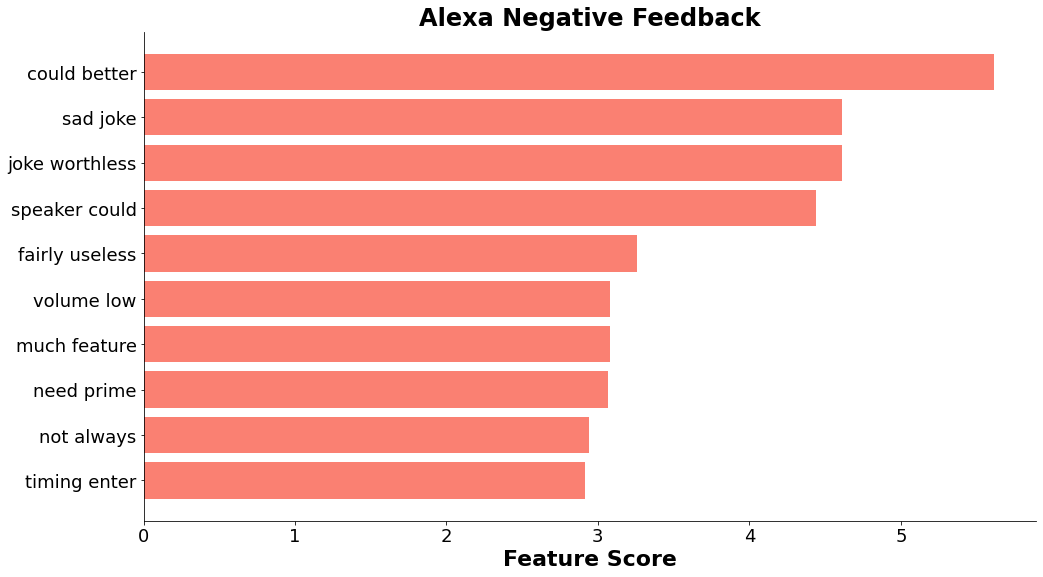

''

<Figure size 432x288 with 0 Axes>

In [52]:
scores = list(zip(tfidf_n.get_feature_names(), chi2score_n))
chi2_n = sorted(scores, key=lambda x:x[1])
topchi2_n = list(zip(*chi2_n[-10:]))
x_n=range(len(topchi2_n[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x_n, topchi2_n[1], align='center', alpha=1, color='salmon')

plt.title('Alexa Negative Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2_n[0]
plt.yticks(x_n, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('alexa_neg.jpg')
;

In [53]:
#Positive
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf = tfidf.fit_transform(pos_alexa['new_reviews'])
y = pos_alexa['rating']
chi2score = chi2(X_tfidf, y)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



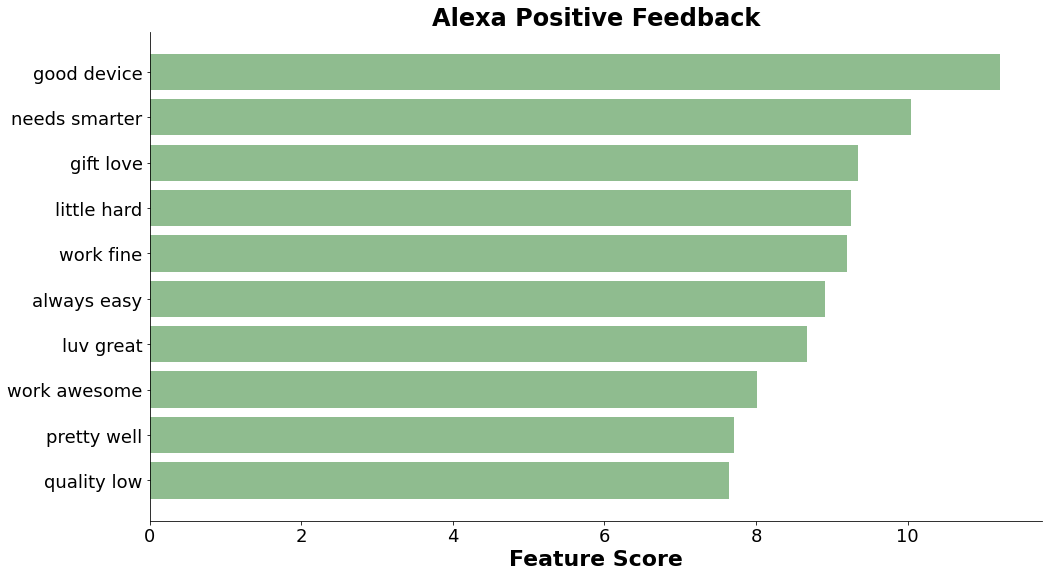

''

<Figure size 432x288 with 0 Axes>

In [55]:
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-10:]))
x=range(len(topchi2[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x,topchi2[1], alpha=1, color='darkseagreen')

plt.title('Alexa Positive Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2[0]
plt.yticks(x, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('alexa_positive.jpg')
;



*   Major takeaways from negative consumer feedback is that Alexa products have low volume, complaints over the speaker and inconsistencies in features
*   Positive reviews also include that it has a low quality but it's a great gift product and easy to use

